In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, Model, losses
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape
from tensorflow.keras.datasets import mnist

import numpy as np
from numpy.linalg import pinv

import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix, classification_report

import seaborn as sns

In [ ]:
np.random.seed(1349)

In [ ]:
# Carregar e preprocessar o dataset MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], -1).astype('float32') / 255.0
x_test = x_test.reshape(x_test.shape[0], -1).astype('float32') / 255.0

# One-hot encoding das labels
encoder = OneHotEncoder(sparse=False)
y_train_onehot = encoder.fit_transform(y_train.reshape(-1, 1))
y_test_onehot = encoder.transform(y_test.reshape(-1, 1))

# Parâmetros do modelo ELM
input_size = x_train.shape[1]
hidden_size = 1000  # número de neurônios na camada oculta
output_size = y_train_onehot.shape[1]

# Inicializar pesos da camada oculta aleatoriamente
W = np.random.randn(input_size, hidden_size)
b = np.random.randn(hidden_size)

# Função de ativação da camada oculta (ReLU)
def relu(x):
    return np.maximum(0, x)

# Calcular a saída da camada oculta
H = relu(np.dot(x_train, W) + b)

# Calcular os pesos da camada de saída usando pseudoinversa
H_pinv = pinv(H)
beta = np.dot(H_pinv, y_train_onehot)

# Fazer previsões no conjunto de teste
H_test = relu(np.dot(x_test, W) + b)
y_pred = np.dot(H_test, beta)

# Converter as previsões para labels
y_pred_labels = np.argmax(y_pred, axis=1)

# Avaliar a acurácia
accuracy = np.mean(y_pred_labels == y_test)
print(f'Test accuracy: {accuracy * 100:.2f}%')

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Test accuracy: 94.38%


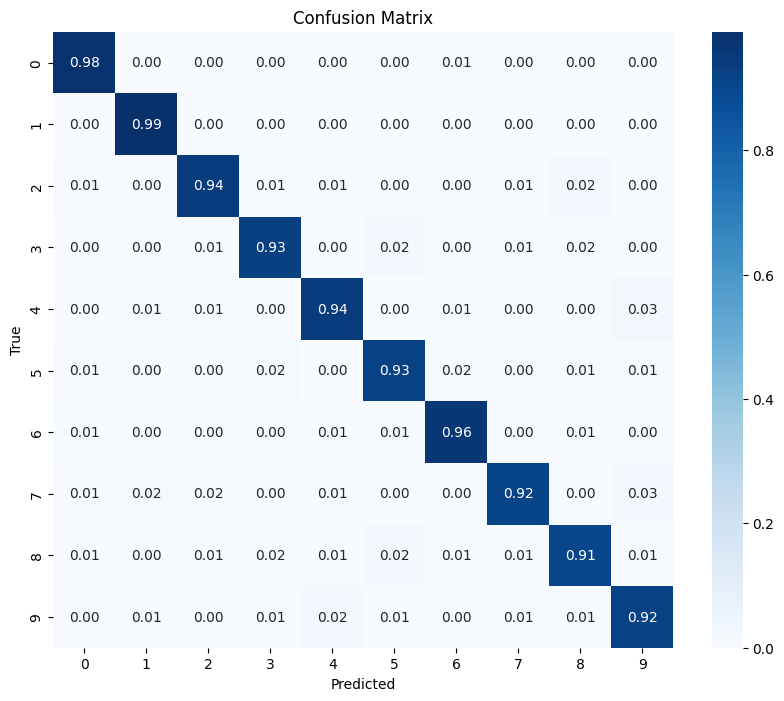

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       980
           1       0.96      0.99      0.98      1135
           2       0.95      0.94      0.95      1032
           3       0.95      0.93      0.94      1010
           4       0.94      0.94      0.94       982
           5       0.92      0.93      0.93       892
           6       0.95      0.96      0.96       958
           7       0.96      0.92      0.94      1028
           8       0.92      0.91      0.91       974
           9       0.92      0.92      0.92      1009

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000



In [ ]:
# Gerar a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred_labels)

# Normalizar a matriz de confusão por linha (por classe verdadeira)
conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

# Exibir a matriz de confusão de forma visual
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_normalized, annot=True, fmt='.2f', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Relatório de classificação
print("Classification Report:")
print(classification_report(y_test, y_pred_labels))